In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [10]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [12]:

#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=7e0285f0546ca419195cb62dc7612afb&units=imperial&q=


In [25]:
city_two = []
clouds = []
dates = []
humidities = []
lats = []
lngs = []
max_temp = []
wind_speed = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | oranjestad
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | port hedland
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | torbay
City not found. Skipping...
Processing Record 15 of Set 1 | isla vista
Processing Record 16 of Set 1 | along
City not found. Skipping...
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | barrow
City not found. Skipping...
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | por

Processing Record 42 of Set 4 | mys shmidta
Processing Record 43 of Set 4 | goundam
Processing Record 44 of Set 4 | vila do maio
Processing Record 45 of Set 4 | mezhdurechensk
City not found. Skipping...
Processing Record 46 of Set 4 | sao sebastiao
Processing Record 47 of Set 4 | bow island
Processing Record 48 of Set 4 | chifeng
Processing Record 49 of Set 4 | cayenne
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | arlit
City not found. Skipping...
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | tieling
Processing Record 9 of Set 5 | mangaratiba
Processing Record 10 of Set 5 | turka
Processing Record 11 of Set 5 | sinnamary
Processing Record 12 of Set 5 | bom jesus
Processing Record 13 of Set 5 | hofn
City not found. Skipping...
Processing Record 14 of S

Processing Record 36 of Set 8 | wexford
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | acarau
City not found. Skipping...
Processing Record 39 of Set 8 | kenai
Processing Record 40 of Set 8 | saint-louis
Processing Record 41 of Set 8 | sitka
Processing Record 42 of Set 8 | dubbo
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | andenes
City not found. Skipping...
Processing Record 45 of Set 8 | kargopol
Processing Record 46 of Set 8 | dalbandin
Processing Record 47 of Set 8 | north myrtle beach
Processing Record 48 of Set 8 | bellevue
Processing Record 49 of Set 8 | bethel
Processing Record 1 of Set 9 | oranjemund
City not found. Skipping...
Processing Record 2 of Set 9 | fairbanks
Processing Record 3 of Set 9 | flin flon
Processing Record 4 of Set 9 | lae
Processing Record 5 of Set 9 | old saybrook
Processing Record 6 of Set 9 | reforma
Processing Record 7 of Set 9 | tullow
Processing Record 8 of Set 9 | juba
Processing 

In [26]:
#Convert to Dictionary and Display the DataFrame
weather_dict = {
    "City": city_two,
    "Cloudiness": clouds,
    "Date": dates,    
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds,
    "Country": countries
}

In [29]:
weather_df = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_df.head(5)

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,saint-philippe,18,1589343093,53,-21.36,55.77,71.60,8.05,RE
1,nikolskoye,29,1589343093,86,59.70,30.79,35.60,6.71,RU
2,bredasdorp,40,1589343093,71,-34.53,20.04,57.20,10.29,ZA
3,kaitangata,0,1589343093,63,-46.28,169.85,55.99,1.99,NZ
4,oranjestad,40,1589342847,78,12.52,-70.03,80.06,26.55,AW


In [31]:
# Exporting to CSV

weather_df.to_csv("weather_df.csv")

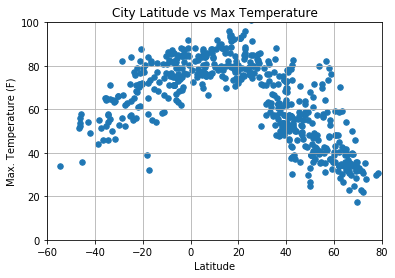

<Figure size 432x288 with 0 Axes>

In [32]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker='o',s=30)
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Latitude Vs Temperature.png")

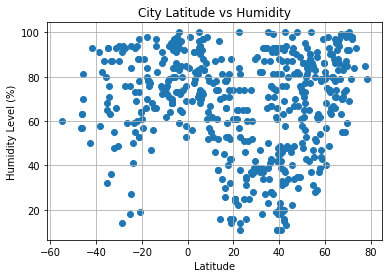

In [40]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker='o')
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('Latitude Vs Humidity.png')

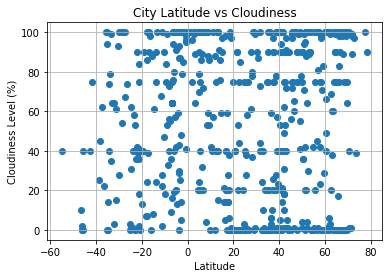

In [39]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker='o')
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('Latitude Vs Cloudiness.png')

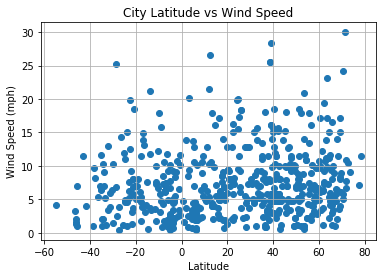

In [41]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker='o')
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('Latitude Vs Wind Speed.png')

In [42]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0.01]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,saint-philippe,18,1589343093,53,-21.36,55.77,71.60,8.05,RE
2,bredasdorp,40,1589343093,71,-34.53,20.04,57.20,10.29,ZA
3,kaitangata,0,1589343093,63,-46.28,169.85,55.99,1.99,NZ
6,rikitea,0,1589343095,73,-23.12,-134.97,75.94,7.54,PF
10,port hedland,64,1589343095,68,-7.03,29.76,71.31,6.26,CD
